In [1]:
# TASK 01 - Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.
# TASK 02 - Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.
# TASK 03 - Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.
# TASK 04 - Develop a hand gesture recognition model that can accurately identify and classify different hand gestures from image or video data, enabling intuitive human-computer interaction and gesture-based control systems.
# TASK 05 - Develop a model that can accurately recognize food items from images and estimate their calorie content, enabling users to track their dietary intake and make informed food choices.

# <h><center><b>**Prodigy InfoTech Internship Program**</b></center></h>
### <h><center><b>**TASK 01 - House Price Prediction**</b></center></h>

**GitHub Repository-** **https://github.com/anweshabose/PRODIGY_ML_01**

<h1><b>House Price Prediction</b></h1>

![](https://repository-images.githubusercontent.com/271120200/47b1e280-aaee-11ea-8650-e6bc22ff8c04)

# **Data Set Problems** 🤔

👉 Implement a **linear regression model to predict the prices of houses** based on their square footage and the number of bedrooms and bathrooms.

---

👨‍💻 **The machine learning models used in this project are:** 
1. Linear regression
2. Ridge regression

# **Introduction**

Machine Learning made it easier for Promoters and common people to predict House Price with a single click. The model is deployed in Streamlit. This kind of prediction can be done using Linear Regression algorithm because it is a Supervised Machine Learning that predicts a continuous numerical value and not any categorical value. So it is Regression based Supervised Machine Learning algorithm and not Binary classification based Supervised Machine Learning algorithm.

Machine learning has significantly enhanced House-Price Prediction by automating data processing and improving accuracy by Model Tuning. Additionally, feature engineering—such as computing mean values for missing data—plays a crucial role in refining predictive accuracy.

Here, we have simply trained the model with some previous historical data and also checked the model's accuracy. We have used Linear regression algorithm to train the model. After that model is tunned to increase Coefficient of Determination (R²). Thus now model can be used for predicting new data. So, there is an obvious 70% chance that it will provide the accurate result.

# **Project Outline**

**Steps that we follow:**

- Installing and importing all the required libraries.
- Importing the csv file.
- Data Description.
- Data Processing
- i) Data Processing - Finding and filling Missing Values
- Feature Scaling
- Prepare the Dataset for ML Training
- Model: Linear Regression
- Evaluate the Best Model (Performance Evaluation)
- Model Tuning
- Make Predictions on New Data => House_Price_Prediction.py
- Summary

# Installing and importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Importing the CSV file

In [5]:
df_train = pd.read_csv("train.csv")
df_train.drop(df_train.columns.difference(['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF','BsmtFinSF1','BedroomAbvGr',
'BsmtFullBath','FullBath','SalePrice']),axis=1, inplace=True)
df_train.head(2)


,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,SalePrice
0,706,856,856,854,1710,1,2,3,208500
1,978,1262,1262,0,1262,0,2,3,181500


In [6]:
df_test = pd.read_csv("test.csv")
df_test.drop(df_test.columns.difference(['1stFlrSF','2ndFlrSF','GrLivArea','TotalBsmtSF','BsmtFinSF1','BedroomAbvGr',
'BsmtFullBath','FullBath','SalePrice']),axis=1, inplace=True)
df_test.head(2)

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr
0,468.0,882.0,896,0,896,0.0,1,2
1,923.0,1329.0,1329,0,1329,0.0,1,3


### **Since there is no "SalePrice" column which is our target column, so we cannot use "test.csv" file as our test data. We need to split "train.csv" into X-train and X-test seperately.**

# Data Description

**Here are the complete names of the columns of house dataset:**

`Square Footage`

- 1stFlrSF – First floor square footage
- 2ndFlrSF – Second floor square footage
- GrLivArea – Above-ground living area square footage
- TotalBsmtSF – Total basement square footage
- BsmtFinSF1 & BsmtFinSF2 – Finished square footage of basement types 1 & 2
- LowQualFinSF – Low-quality finished square footage

`Number of Bedrooms`

- BedroomAbvGr – Number of bedrooms above ground

`Number of Bathrooms`

- BsmtFullBath – Full bathrooms in the basement
- BsmtHalfBath – Half bathrooms in the basement
- FullBath – Number of full bathrooms above ground
- HalfBath – Number of half bathrooms above ground

In [7]:
df_train.describe()

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,2.866438,180921.195890
std,456.098091,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.815778,79442.502883
min,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,0.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,2.000000,129975.000000
50%,383.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,3.000000,163000.000000
75%,712.250000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,3.000000,214000.000000
max,5644.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,8.000000,755000.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BsmtFinSF1    1460 non-null   int64
 1   TotalBsmtSF   1460 non-null   int64
 2   1stFlrSF      1460 non-null   int64
 3   2ndFlrSF      1460 non-null   int64
 4   GrLivArea     1460 non-null   int64
 5   BsmtFullBath  1460 non-null   int64
 6   FullBath      1460 non-null   int64
 7   BedroomAbvGr  1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


In [9]:
df_train.shape

(1460, 9)

# Data Processing

# i) Data Processing - Finding and filling Missing Values

In [10]:
df_train.isnull().sum()

BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

### Thus, there is no missing value and all columns are numerical, so no encoding required.

# Feature Scaling
Feature Scaling is a technique used in machine learning to normalize or standardize numerical data so that features are on a similar scale.

In [11]:
# Standardizes the features by subtracting the mean and dividing by the standard deviation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop('SalePrice', axis=1))
# Target variable should be excluded from scaling

In [12]:
X = pd.DataFrame(scaled_features, columns=df_train.drop(columns=["SalePrice"]).columns)  # X: Independent variable
y = df_train["SalePrice"]   # y: Dependent variable

# Prepare the Dataset for ML Training
Preparing the dataset is essential because we don't have to train the entire dataset. Maximum part of the dataset will be used for training and remaining part will be used for testing the accuracy. 
If Accuracy is not met then we have to tune the model or else we have to change the algorithm.

In [13]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(df_train.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1460, 9)
(1168, 8)
(1168,)
(292, 8)
(292,)


# **Model: Linear Regression**

In [15]:
# Model Training: Here, we are training the model with X_train and y_train
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predicting the trained-model on X_test to get the predicted values of y.
linear_y_preds = lin_model.predict(X_test)

In [17]:
# checking whether predicted values of y is equal to Actual values of y.

mae = mean_absolute_error(y_test, linear_y_preds)
mse = mean_squared_error(y_test, linear_y_preds)
rmse = root_mean_squared_error(y_test, linear_y_preds)
r2 = r2_score(y_test, linear_y_preds)

print("Mean Absolute Error", mae)
print("Mean Squared Error", mse)
print("Root Mean Squared Error", rmse)
print("Coefficient of Determination", r2)

Mean Absolute Error 29331.76772370116
Mean Squared Error 2075478762.1679964
Root Mean Squared Error 45557.42269013905
Coefficient of Determination 0.7294145377776418


### **The Coefficient of Determination (R²) indicates how well your regression model explains the variance in the target variable (SalePrice in this case).**
Interpreting R² = 0.729
- 72.94% of the variance in house prices is explained by your features (GrLivArea, TotalBsmtSF, etc.).
- The remaining 27.06% is unexplained—likely due to missing features, randomness, or noise in the data.
### **A high R² (closer to 1) means the model is effective.**

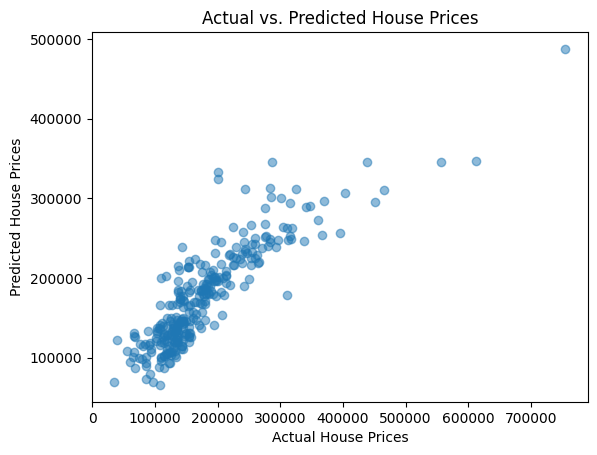

In [18]:
# SCATTER PLOT

plt.scatter(y_test, linear_y_preds, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

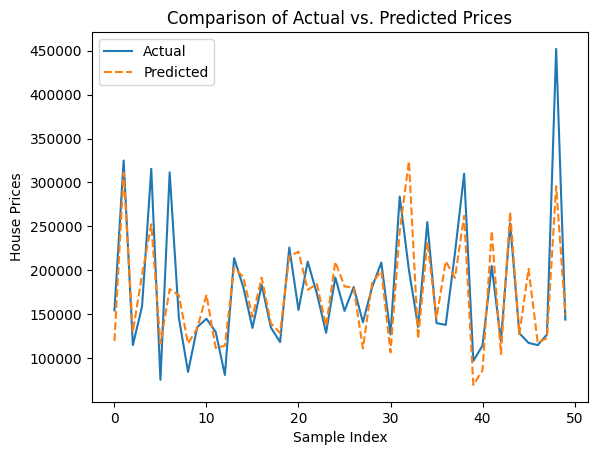

In [19]:
# LINE PLOT

plt.plot(y_test.values[:50], label="Actual", linestyle="-")
plt.plot(linear_y_preds[:50], label="Predicted", linestyle="--")
plt.xlabel("Sample Index")
plt.ylabel("House Prices")
plt.title("Comparison of Actual vs. Predicted Prices")
plt.legend()
plt.show()

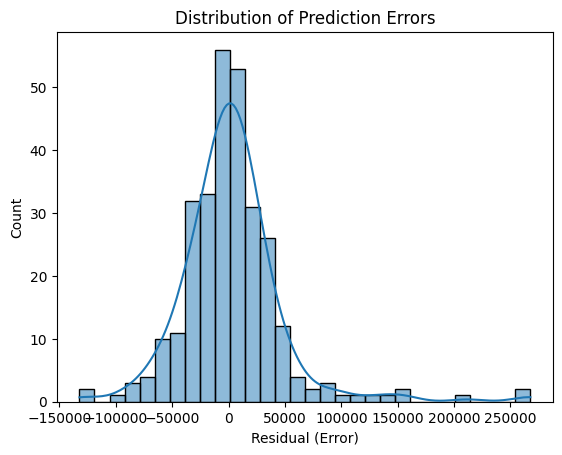

In [20]:
# RESIDUAL PLOT

residuals = y_test - linear_y_preds
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual (Error)")
plt.title("Distribution of Prediction Errors")
plt.show()

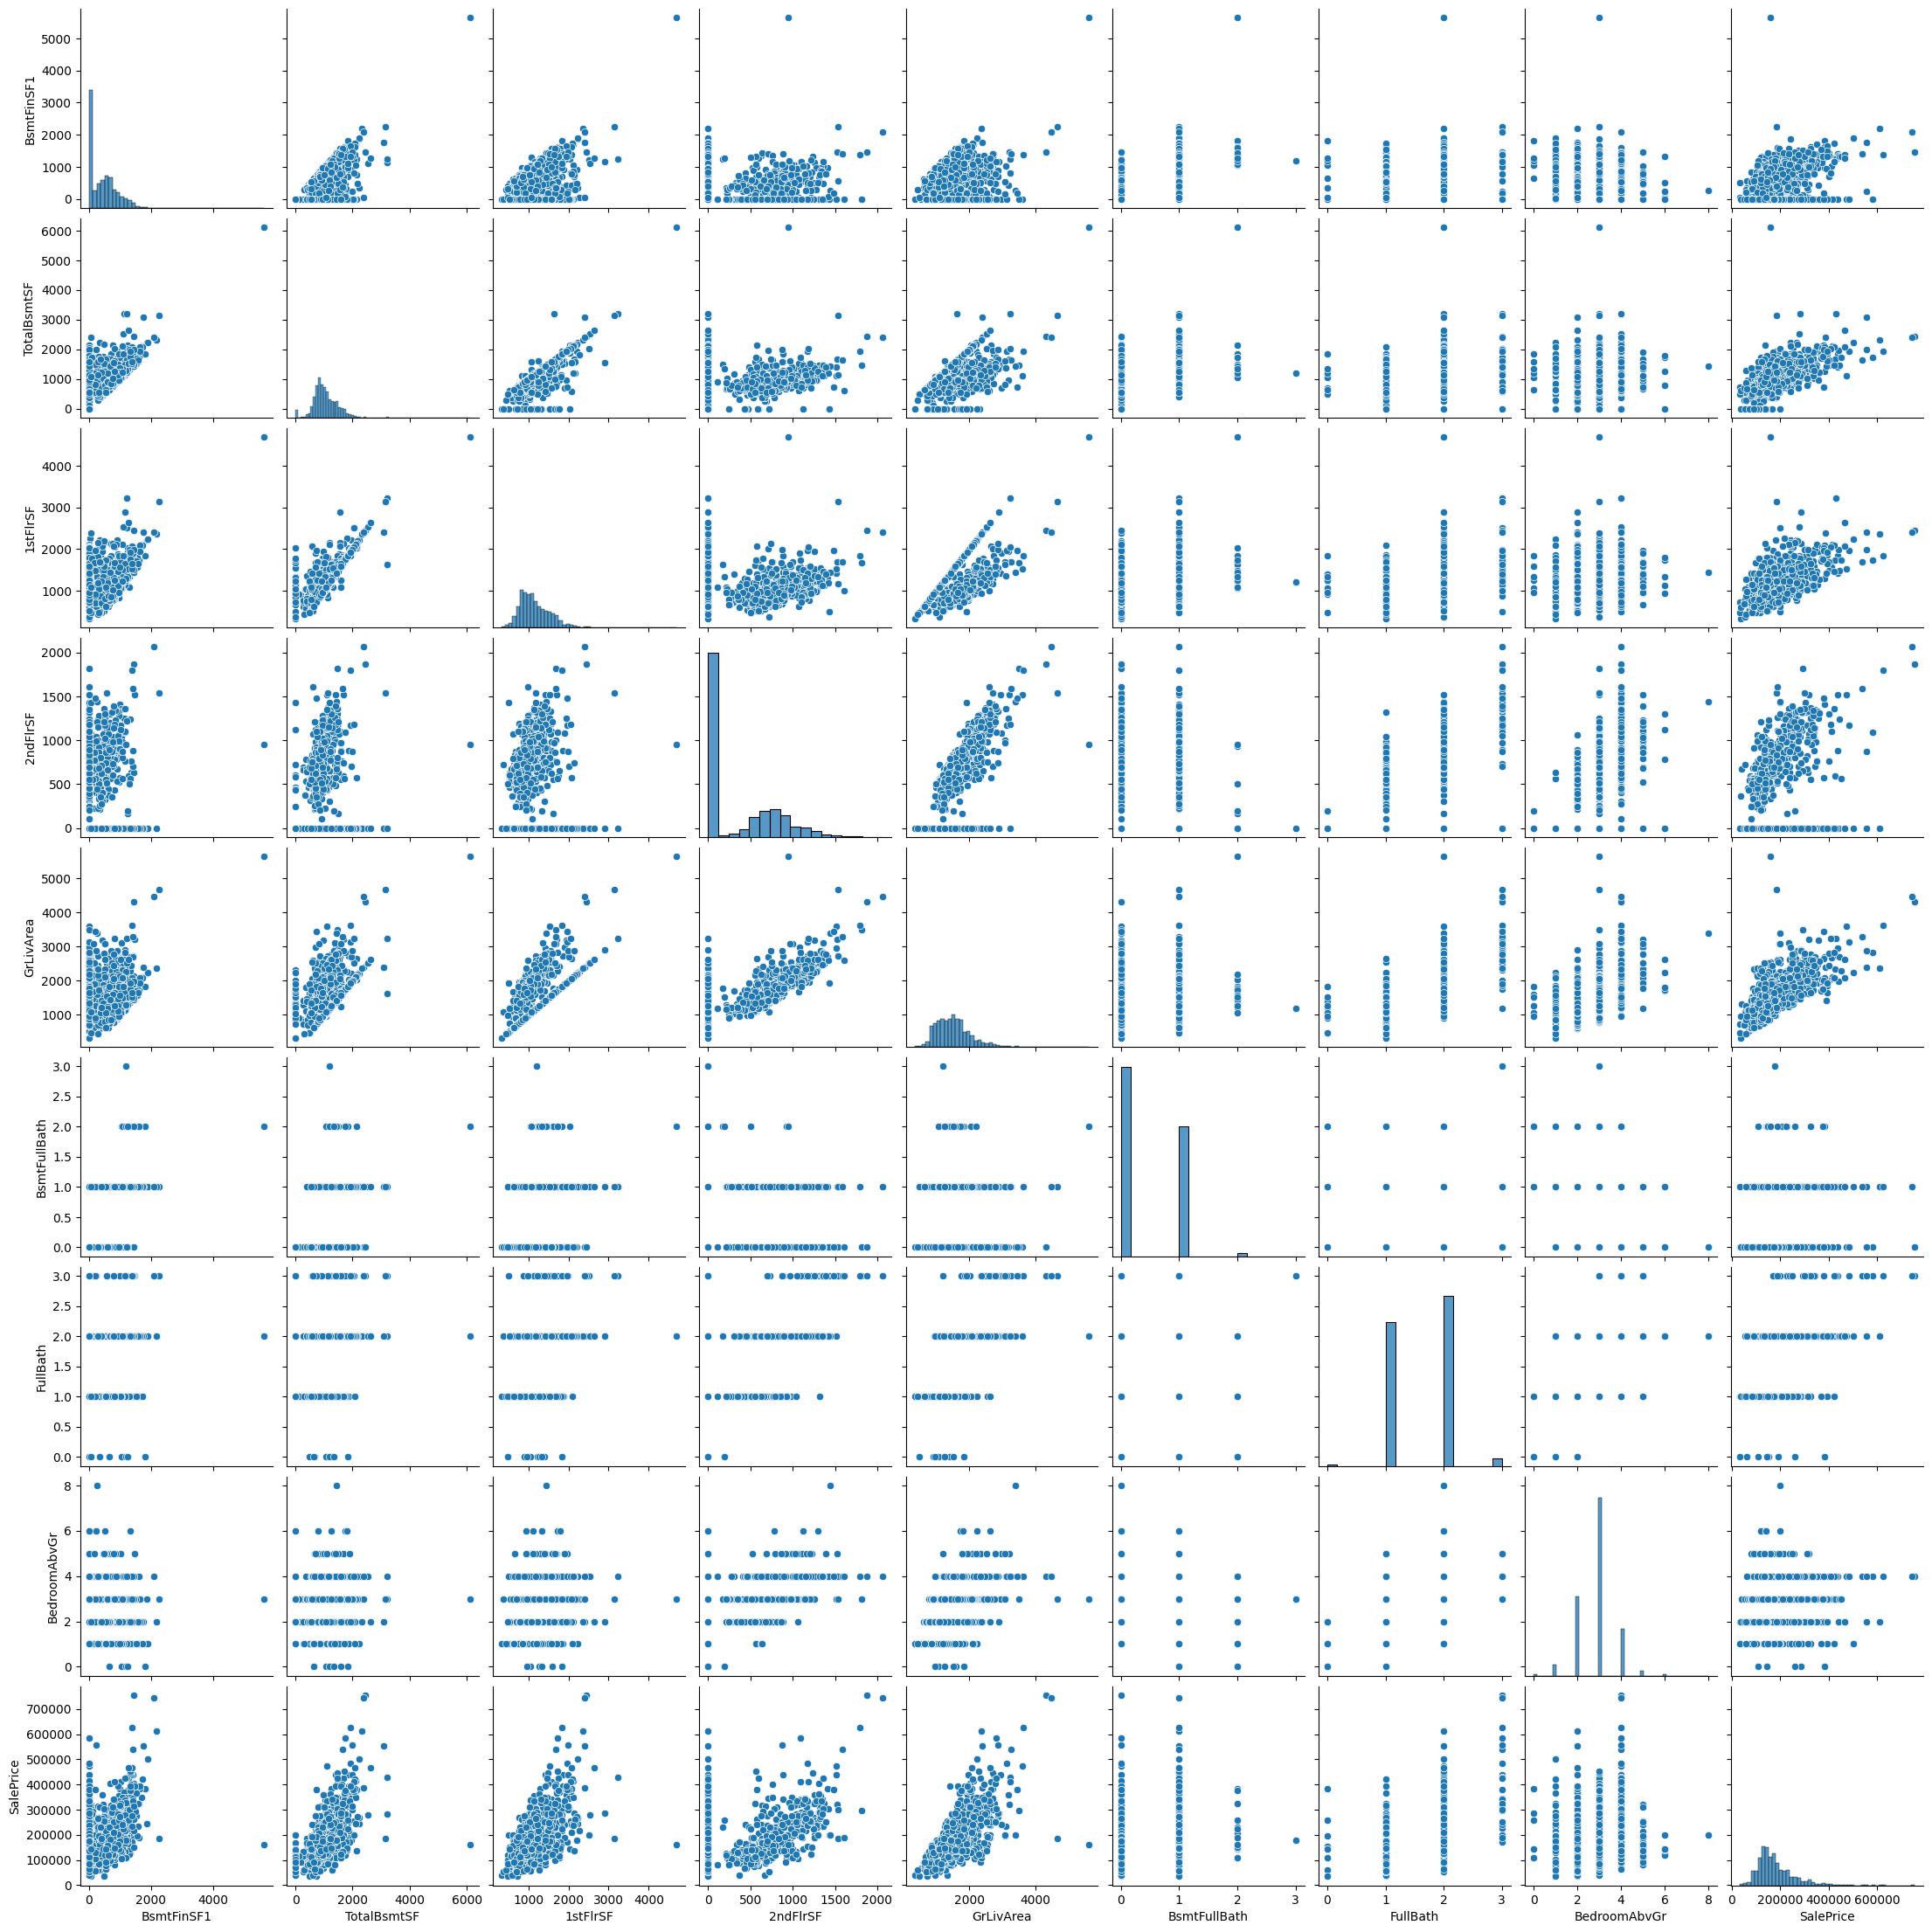

In [21]:
sns.pairplot(df_train)

# Model Tunning

# **1. Regularization (Ridge Regression/Lasso)**
- Linear regression may overfit, especially with multiple correlated features.
- Use Ridge (L2) or Lasso (L1) regression to improve generalization.

In [ ]:
from sklearn.linear_model import RidgeCV

ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0])
ridge_model.fit(X_train, y_train)
linear_y_preds = ridge_model.predict(X_test)
r2 = r2_score(y_test, linear_y_preds)
print("Coefficient of Determination", r2)

Coefficient of Determination 0.726225899641506


In [23]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
linear_y_preds = ridge_model.predict(X_test)
r2 = r2_score(y_test, linear_y_preds)
print("Coefficient of Determination", r2)

Coefficient of Determination 0.7290297459671558


# **2. XGBoost**

In [25]:
from xgboost.sklearn import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
linear_y_preds = xgb_model.predict(X_test)
r2 = r2_score(y_test, linear_y_preds)
print("Coefficient of Determination", r2)

Coefficient of Determination 0.7539081573486328


# **3. Handle Outliers in SalePrice**
- Extreme values in SalePrice can reduce R².
- Apply a log transformation to stabilize variance:

In [26]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop('SalePrice', axis=1))
X = pd.DataFrame(scaled_features, columns=df_train.drop(columns=["SalePrice"]).columns)  # X: Independent variable
y = df_train["SalePrice"]   # y: Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
linear_y_preds = lin_model.predict(X_test)
r2 = r2_score(y_test, linear_y_preds)
print("Coefficient of Determination", r2)

Coefficient of Determination 0.7245045778552048


### **Model Comparison**

In [31]:
compare = pd.DataFrame({'Model': ["Linear Regression with Normalization", "Ridge Regression with RidgeCV", "Ridge Regression with Ridge", "XGBoost", "Linear Regression without Outliers"], 
                        'R2 Score': [0.729, 0.726, 0.729, 0.753, 0.724]})
compare

,Model,R2 Score
0,Linear Regression with Normalization,0.729
1,Ridge Regression with RidgeCV,0.726
2,Ridge Regression with Ridge,0.729
3,XGBoost,0.753
4,Linear Regression without Outliers,0.724


### **Check Feature Importance**
Use Random Forest or Gradient Boosting to check which features contribute most to price prediction:

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
feature_importance = rf.feature_importances_

# Sort important features
important_features = sorted(zip(X_train.columns, feature_importance))
print(important_features[:10])  # View top 10 important features

[('1stFlrSF', np.float64(0.06494055480808654)), ('2ndFlrSF', np.float64(0.05550024612224719)), ('BedroomAbvGr', np.float64(0.03923226440098891)), ('BsmtFinSF1', np.float64(0.08004989677733768)), ('BsmtFullBath', np.float64(0.0073373378816994385)), ('FullBath', np.float64(0.020747062641962452)), ('GrLivArea', np.float64(0.5058184089264806)), ('TotalBsmtSF', np.float64(0.22637422844119737))]


In [29]:
df_train.corr()

,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,SalePrice
BsmtFinSF1,1.000000,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,-0.107355,0.372023
TotalBsmtSF,0.522396,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,0.050450,0.612134
1stFlrSF,0.445863,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,0.127401,0.596981
2ndFlrSF,-0.137079,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.502901,0.319300
GrLivArea,0.208171,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.521270,0.700927
BsmtFullBath,0.649212,0.307351,0.244671,-0.169494,0.034836,1.000000,-0.064512,-0.150673,0.236224
FullBath,0.058543,0.323722,0.380637,0.421378,0.630012,-0.064512,1.000000,0.363252,0.594771
BedroomAbvGr,-0.107355,0.050450,0.127401,0.502901,0.521270,-0.150673,0.363252,1.000000,0.209043
SalePrice,0.372023,0.612134,0.596981,0.319300,0.700927,0.236224,0.594771,0.209043,1.000000


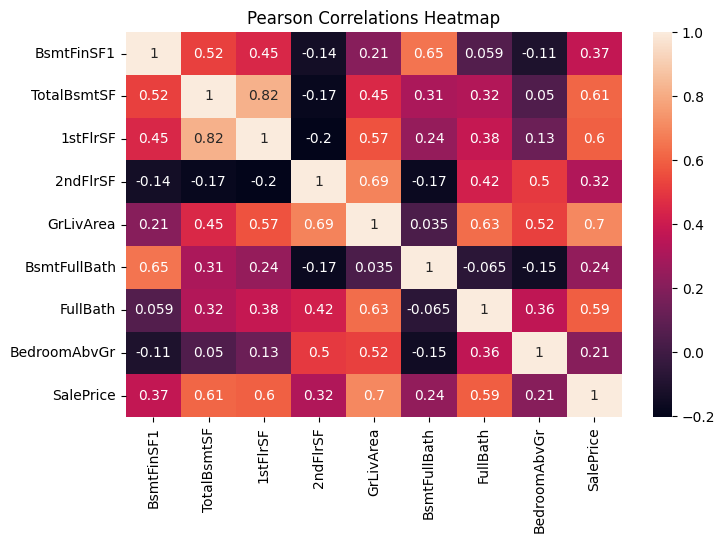

In [30]:
plt.figure(figsize = (8, 5))
sns.heatmap(df_train.corr(), annot = True).set_title("Pearson Correlations Heatmap")
plt.show()

# **Summary**

We downloaded, explored, performed EDA(Exploratory Data Analysis), observed for any missing values and trained the dataset with Regression based Supervised machine learning algorithm i.e. Linear Regression to predict house price for given new data.

- Total Train Dataset contains 1460 rows and 81 columns.
- Total Test Dataset contains 1459 rows and 81 columns.
- After including necessary column, Total Train Dataset contains 1460 rows and 9 columns.
- After including necessary column, Total Test Dataset contains 1459 rows and 8 columns.
- Since there is no "SalePrice" column which is our target column, so we cannot use Test dataset for testing. We need to split Train dataset into X-train and X-test.
- Performed Exploratory Data Analysis.
- Normalized the entire Data.
- Then split the data into train data and test data.
- Training data had approximately 1168 rows and 9 columns.
- Test data had approximately 292 rows and 9 columns.
- Trained the model to perform the required Application of predicting House Price correctly.
- Training algorithm is: `Linear Regression`
- As per model performance, `R² = 0.729` that means 72.94% of the variance in house prices is explained by the features. Remaining 27.06% is unexplained.
- Later Model Tunning is performed to increase the variability.

### **Now you can also predict House Price just by providing few necessary Informations. 😊**

## **THANK YOU 😊**